# Homicide Data Analysis Portfolio Project

## 1. Project Overview
This project aims to analyze homicide trends using real-world data, identifying patterns related to geography, demographics, and weapon usage. The study provides insights into how homicide rates vary across different regions and time periods, helping policymakers and researchers make informed decisions.

## 2. Introduction
Homicides remain a significant global issue, impacting policies, law enforcement strategies, and public safety measures. Understanding the factors that influence homicide rates can help in devising strategies to reduce crime and improve safety. This analysis explores key trends, demographic influences, and regional variations in homicide data.

## 3. Data Cleaning
### 3.1 Dataset Overview
- **Source:** `homicide_by_countries.csv`
- **Key Columns:**
  - `Location` (Country/Region)
  - `Year`
  - `Count` (Total Homicides)
  - `Rate` (Per 100,000 people)
  - `Weapon Used`
  - `Victim Details` (Age, Gender, Relationship to Perpetrator)

### 3.2 Data Cleaning Process
- Removed duplicate records to maintain data integrity.
- Dropped missing values to ensure accuracy.
- Converted the `Year` column to integer format for consistency.
- Standardized country and region names to avoid inconsistencies in geographic analysis.

## 4. Exploratory Data Analysis (EDA)
### 4.1 Homicide Trends Over Time
- Analyzed homicide rates across different years to identify trends and anomalies.
- Examined the impact of external factors such as conflicts and policy changes on homicide rates.

### 4.2 Geographic Distribution of Homicides
- Identified countries with the highest homicide rates.
- Visualized global homicide trends using maps to highlight high-risk regions.

### 4.3 Demographic Analysis
- Examined gender-based disparities in homicide rates.
- Identified age groups most affected by homicides.
- Analyzed victim-perpetrator relationships to understand crime patterns.

### 4.4 Weapon Usage Trends
- Studied the most common weapons used in homicides.
- Explored regional variations in weapon preferences and their impact on crime severity.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [12]:
df=pd.read_csv('homicide_by_countries.csv')

In [6]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [7]:
df.shape

(195, 6)

In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [9]:
df.columns

Index(['Location', 'Region', 'Subregion', 'Rate', 'Count', 'Year'], dtype='object')

In [10]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [11]:
df.Rate=df.Rate.astype(int)

In [13]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012


In [14]:
df1=df[['Location','Count']].sort_values(by='Count',ascending= False).head()

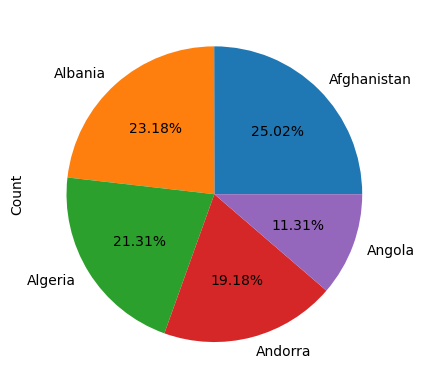

In [49]:
df1.plot(x='Location',y='Count',kind='pie',labels=df.Location,autopct='%1.2f%%')
plt.legend().set_visible(False)

In [33]:
df1["perc"]=(df1['Count']*100/df1["Count"].sum()).round(2)

In [41]:
df["Region"].replace('N/S america','N/S America',inplace= True)

In [46]:
df2=df.groupby('Region')['Count'].sum().sort_values(ascending=False)

In [47]:
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

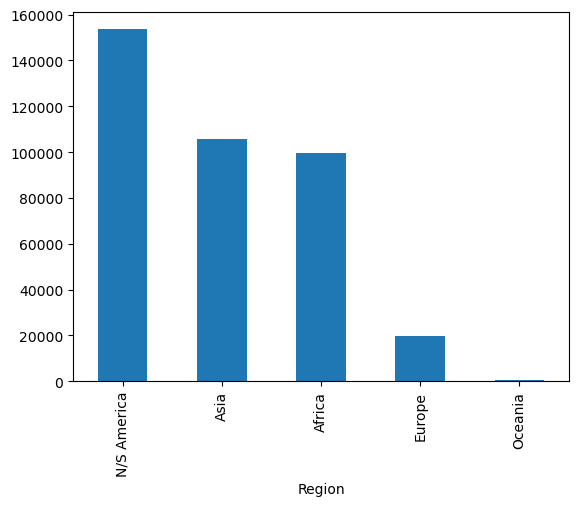

In [51]:
df2.plot(kind='bar')
plt.show()

In [94]:
df3=df.groupby(['Subregion'])['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

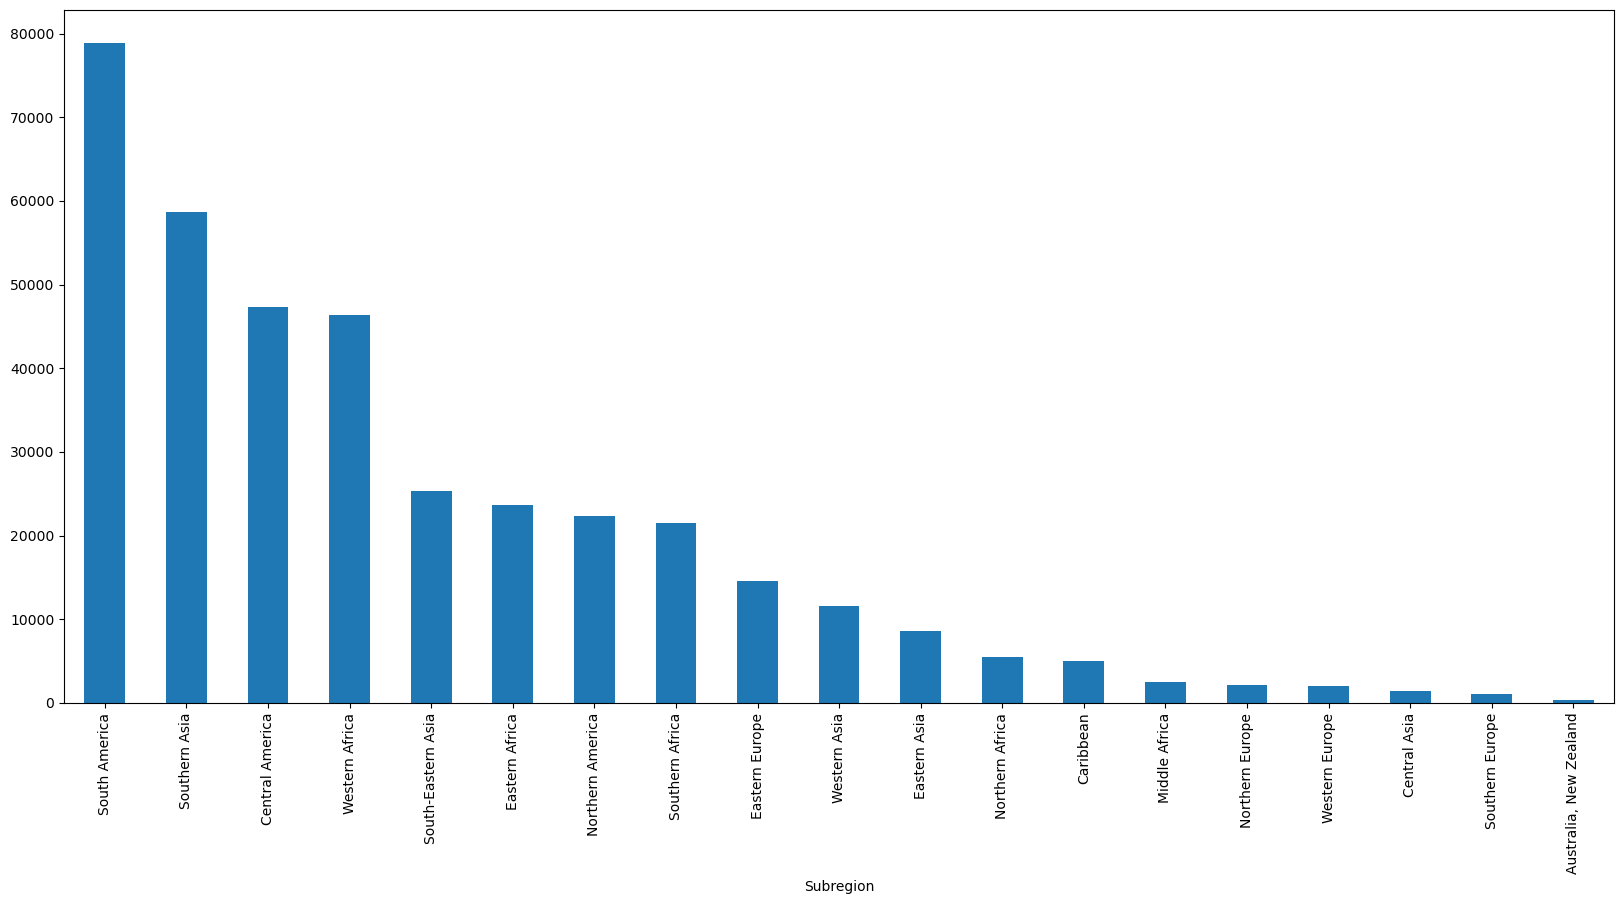

In [95]:
plt.figure(figsize=(20,9))
df3.plot(kind='bar')
plt.show()

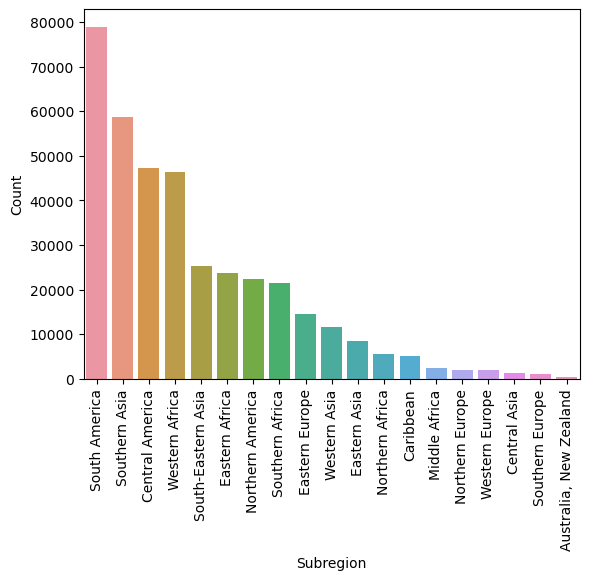

In [111]:
plt.xlabel('Subregion')
plt.ylabel('Count')
sns.barplot(x=df3.index,y=df3.values)
plt.xticks(rotation=90)
plt.show()

In [51]:
df4=df[df.Region.isin(['Asia','Europe'])]

In [113]:
df[(df['Region']=='Asia') | (df['Region']=='Europe')]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [4]:
df=pd.read_csv('Homicide',index_col=0)

In [53]:
df4=df4[df4['Year']>2016][['Region','Year','Count']]

In [55]:
df4=df4.groupby(['Region','Year']).sum()['Count']

In [56]:
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [72]:
df4=df4.sort_values(ascending=False)

In [135]:
df4_unstacked=df4.unstack(level=0)

In [127]:
df4_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [146]:
df4_unstacked.index=df4_unstacked.index.astype(str)

In [332]:
df4

Region  Year
Asia    2020    53516
        2018    16923
        2021    15299
Europe  2020    15066
Asia    2019     6458
Europe  2017     3670
Asia    2017     1787
Europe  2018      883
        2019      249
Name: Count, dtype: int64

In [333]:
d1=df4.reset_index()

In [147]:
df4_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [148]:
df4_unstacked.index

Index(['2017', '2018', '2019', '2020', '2021'], dtype='object', name='Year')

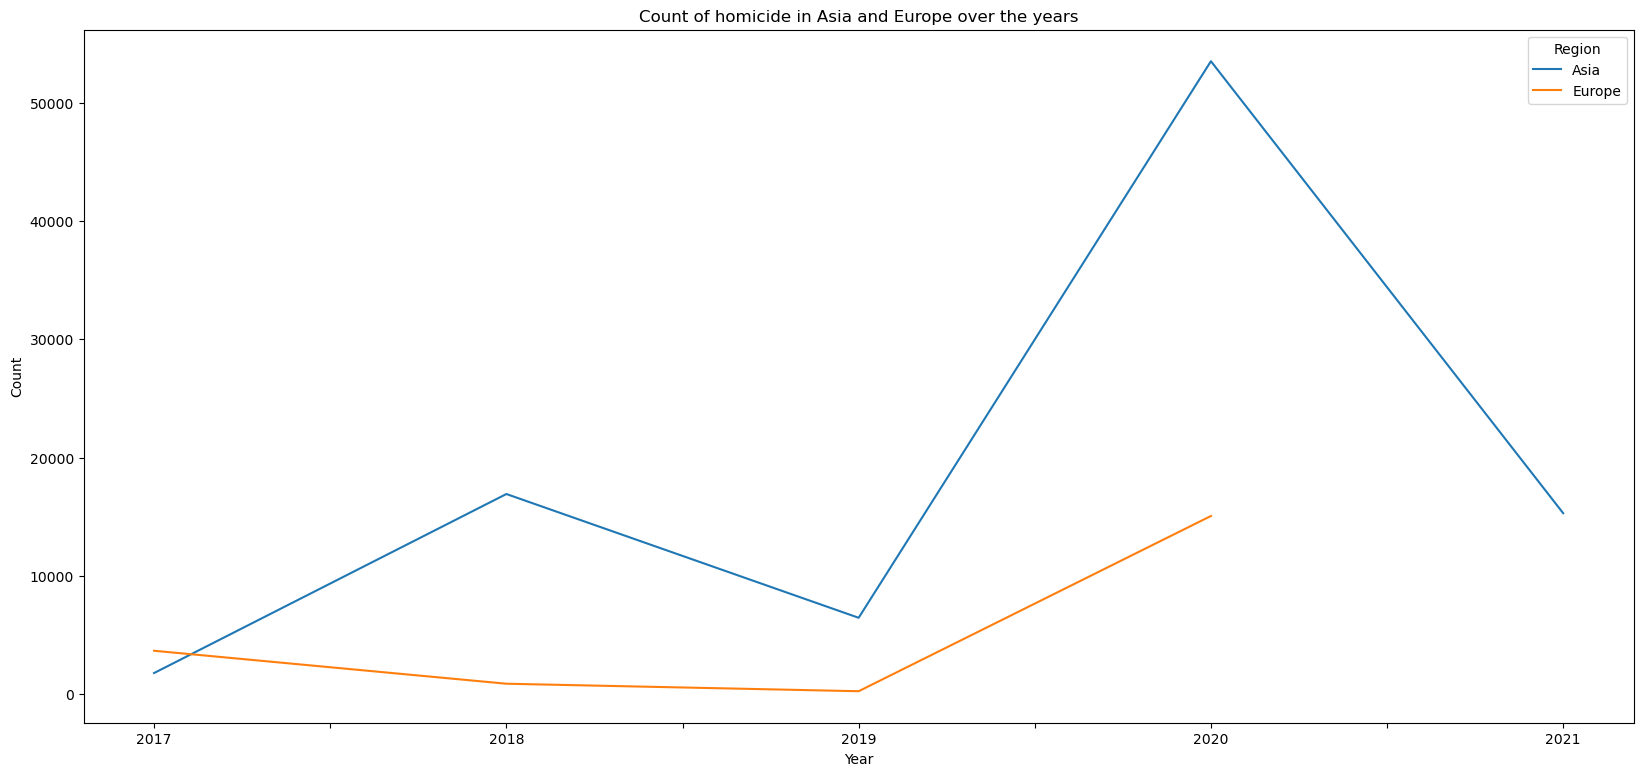

In [154]:
df4_unstacked.plot(kind='line',figsize=(20,9))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of homicide in Asia and Europe over the years')
plt.show()

In [158]:
df5=df.groupby('Year')['Rate'].sum().sort_values(ascending=False)

<Axes: xlabel='Year'>

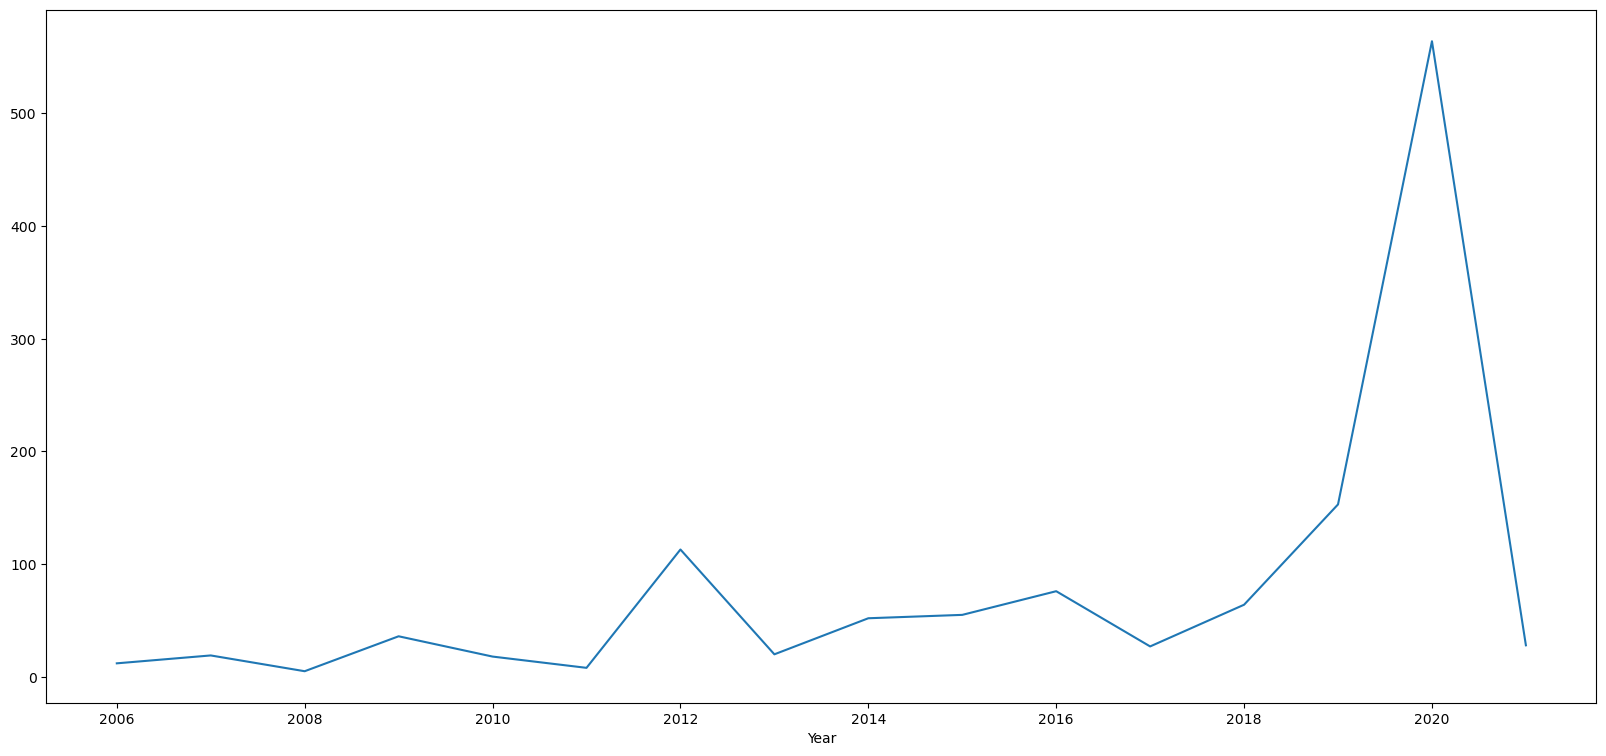

In [157]:
df5.plot(kind='line',figsize=(20,9))

<Axes: xlabel='Year'>

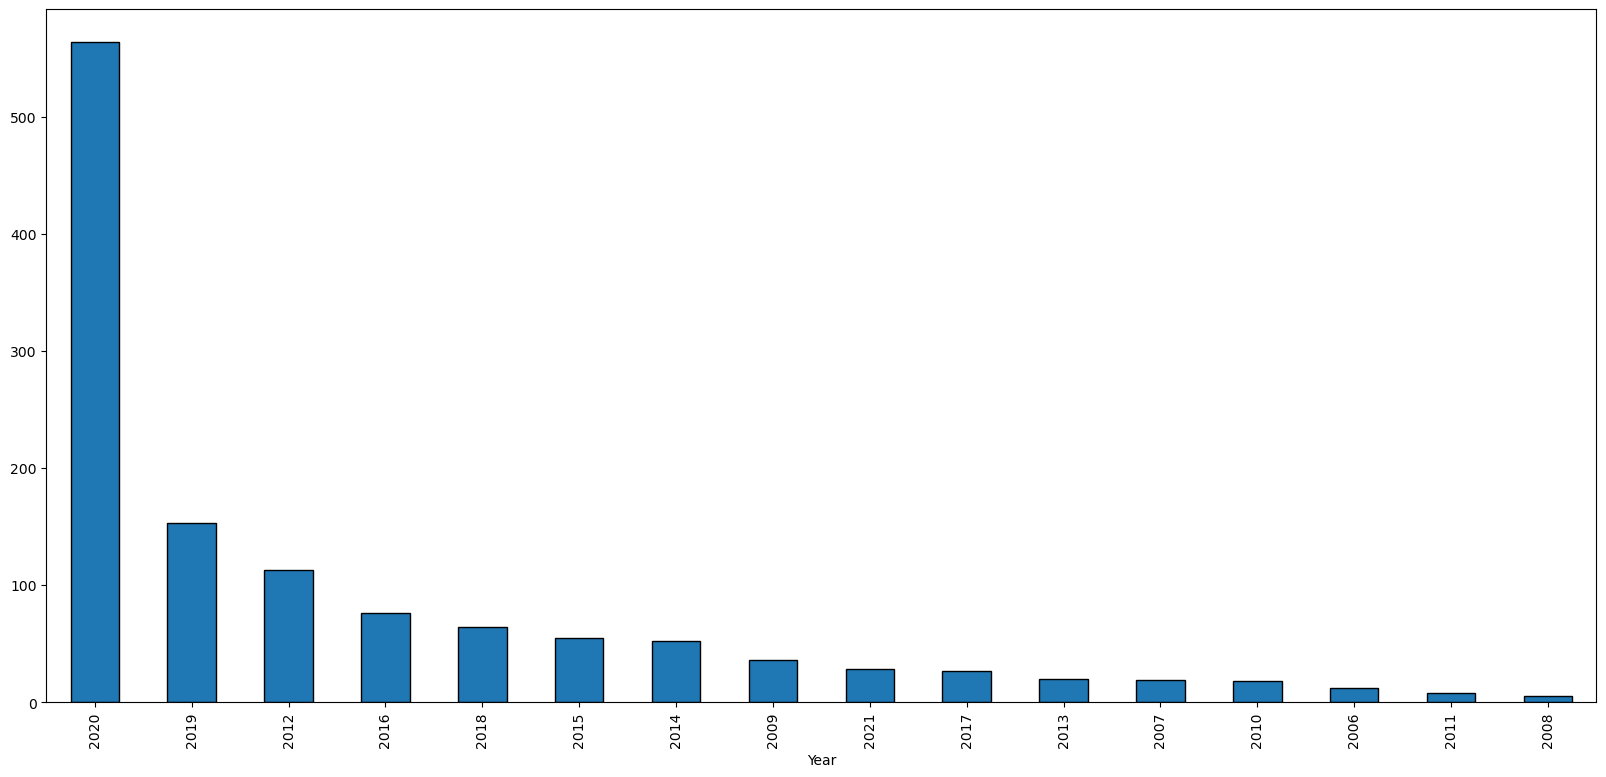

In [186]:
df5.plot(kind='bar',figsize=(20,9),edgecolor='black')

In [188]:
df5=df5.reset_index()

In [189]:
df5

,Year,Rate
0,2020,564
1,2019,153
2,2012,113
3,2016,76
4,2018,64
5,2015,55
6,2014,52
7,2009,36
8,2021,28
9,2017,27


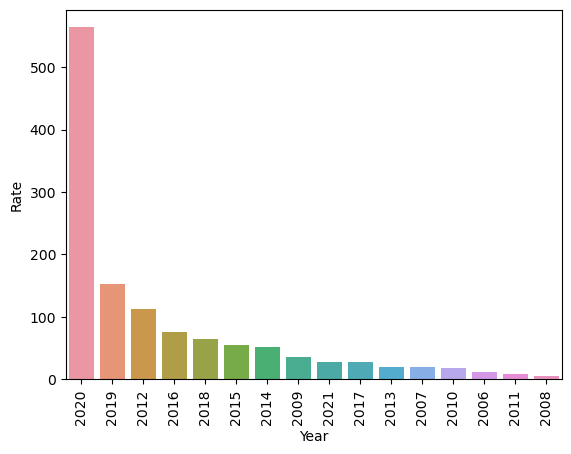

In [193]:
sns.barplot(x='Year',y='Rate',data=df5,order=df5.sort_values('Rate',ascending=False).Year)
plt.xticks(rotation='vertical')
plt.show()

In [272]:
df6=df[['Region','Year','Count']]

In [273]:
df6

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
2,Africa,2020,580
3,Europe,2020,2
4,Africa,2012,1217
...,...,...,...
190,N/S America,2018,10598
191,Asia,2011,1358
192,Asia,2013,1703
193,Africa,2015,853


In [274]:
df6=df6.groupby(['Year','Region']).sum().sort_values('Year',ascending=False).head(40)

<Axes: xlabel='Year,Region'>

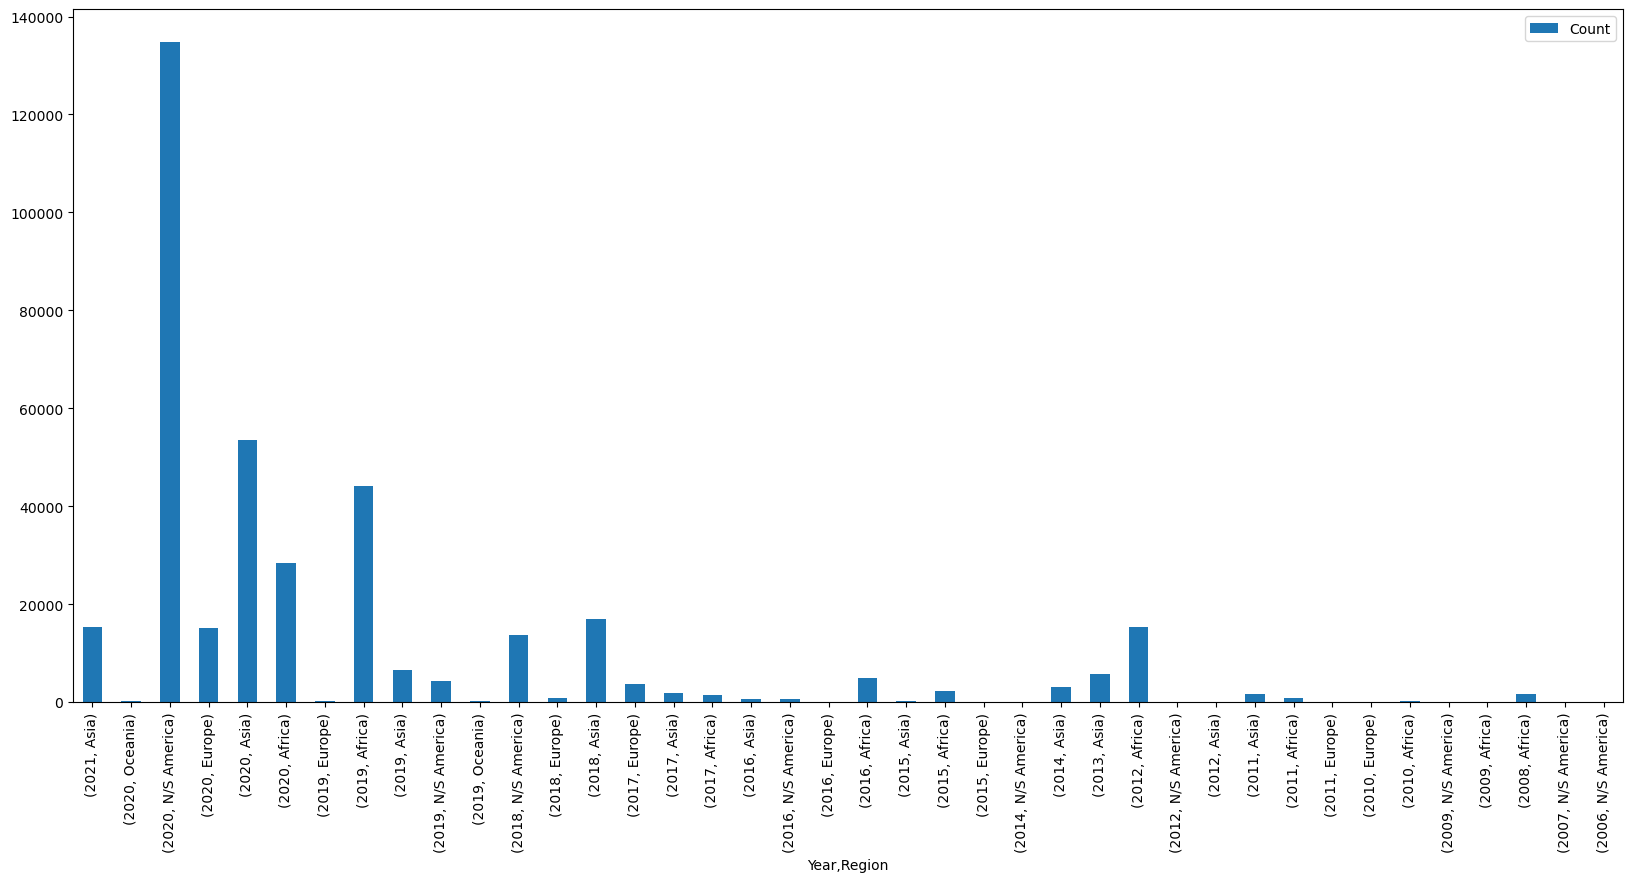

In [275]:
df6.plot(kind='bar',figsize=(20,9))

# 5. Key Findings
### 5.1 Insights Gathered
- Some regions consistently exhibit high homicide rates due to social, economic, and political factors.
- The distribution of homicide rates is skewed, with certain countries experiencing disproportionately high crime levels.
- Gender-based disparities reveal that males are more likely to be victims and perpetrators.
- The victim-perpetrator relationship plays a crucial role in understanding crime patterns.
- Specific weapons are more commonly used in particular regions, indicating possible links to local crime culture or accessibility.

### 5.2 Future Recommendations
- Conduct further research on the impact of policies and law enforcement measures on homicide trends.
- Cross-analyze homicide data with economic and social indicators to identify underlying causes.
- Develop predictive models to forecast crime trends and assist in proactive policymaking.

## 6. Conclusion
This project provides a comprehensive analysis of global homicide trends, highlighting key patterns and insights. By understanding homicide data from multiple perspectives—temporal, geographic, and demographic—this study contributes to crime prevention strategies and policy development. Future work can expand on these findings by integrating additional socioeconomic and policy-driven factors.
